# imports

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt


In [ ]:
t=np.arange(0,10,0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [ ]:
np.exp(t/2)

array([  1.        ,   1.28402542,   1.64872127,   2.11700002,
         2.71828183,   3.49034296,   4.48168907,   5.75460268,
         7.3890561 ,   9.48773584,  12.18249396,  15.64263188,
        20.08553692,  25.79033992,  33.11545196,  42.521082  ,
        54.59815003,  70.10541235,  90.0171313 , 115.58428453])

# metodos

In [ ]:
def euler(t0, y0, h, n, f):
    t = np.arange(t0, t0 + (n+1) * h, h)
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + h * f(t[i-1], y[i-1])
    return t, y

def bw_euler(t0, y0, h, n, f):
    t = np.arange(t0, t0 + (n+1) * h, h)
    y = np.zeros(len(t))
    y[0] = y0
    g = lambda tnew, yprev, ynew: ynew - yprev - h * f(tnew, ynew)
    for i in range(1, len(t)):
        y[i] = fsolve(lambda ynew: g(t[i], y[i-1], ynew), y[i-1])[0]
    return t, y

def rk2(t0, y0, h, n, f):
    t = np.arange(t0, t0 + (n+1) * h, h)
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + h/2, y[i-1] + h/2 * k1)
        y[i] = y[i-1] + h * k2
    return t, y

In [ ]:
f= lambda t,y: y/2
euler(0,1,0.5,20, f)[1]

array([ 1.        ,  1.25      ,  1.5625    ,  1.953125  ,  2.44140625,
        3.05175781,  3.81469727,  4.76837158,  5.96046448,  7.4505806 ,
        9.31322575, 11.64153218, 14.55191523, 18.18989404, 22.73736754,
       28.42170943, 35.52713679, 44.40892099, 55.51115123, 69.38893904,
       86.7361738 ])

In [ ]:
bw_euler(0,1,0.5,20, f)[1]

array([  1.        ,   1.33333333,   1.77777778,   2.37037037,
         3.16049383,   4.21399177,   5.61865569,   7.49154092,
         9.98872123,  13.31829498,  17.75772663,  23.67696885,
        31.56929179,  42.09238906,  56.12318541,  74.83091388,
        99.77455184, 133.03273579, 177.37698105, 236.5026414 ,
       315.3368552 ])

In [ ]:
rk2(0,1,0.5,20, f)[1]

array([  1.        ,   1.28125   ,   1.64160156,   2.103302  ,
         2.69485569,   3.45278385,   4.42387931,   5.66809537,
         7.26224719,   9.30475421,  11.92171633,  15.27469905,
        19.57070816,  25.07496983,  32.1273051 ,  41.16310966,
        52.74023425,  67.57342513,  86.57845095, 110.92864028,
       142.12732035])

# Grafica

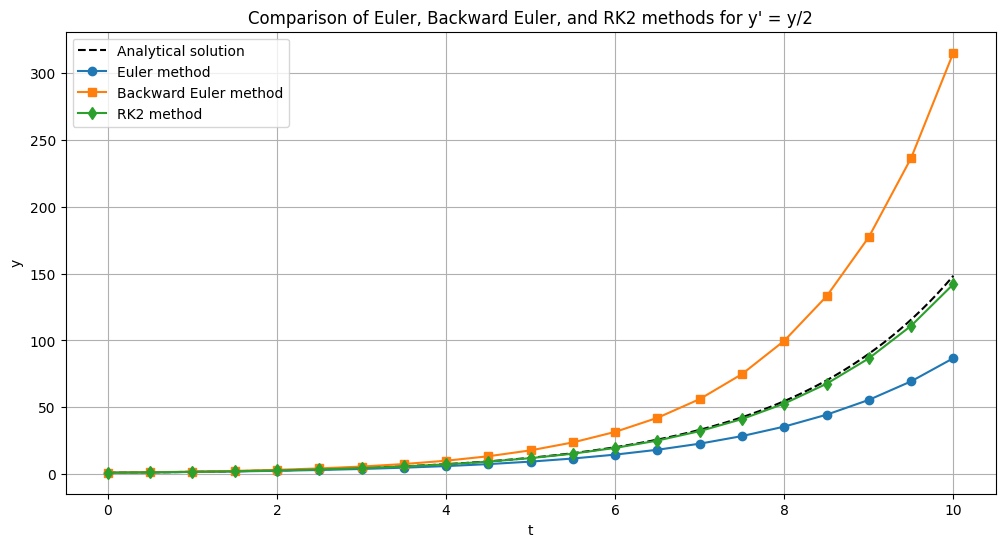

In [ ]:
# ODE: y' = y / 2
def f(t, y):
    return y / 2

# Analytical solution for comparison
def analytical_solution(t):
    return np.exp(t / 2)

# Initial conditions and parameters
t0 = 0
y0 = 1
h = 0.5
n = 20  # Number of steps

# Solve using all three methods
t_euler, y_euler = euler(t0, y0, h, n, f)
t_bw_euler, y_bw_euler = bw_euler(t0, y0, h, n, f)
t_rk2, y_rk2 = rk2(t0, y0, h, n, f)

# Analytical solution
t_analytical = np.linspace(t0, t0 + n * h, 1000)
y_analytical = analytical_solution(t_analytical)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(t_analytical, y_analytical, label="Analytical solution", color="black", linestyle="dashed")
plt.plot(t_euler, y_euler, 'o-', label="Euler method")
plt.plot(t_bw_euler, y_bw_euler, 's-', label="Backward Euler method")
plt.plot(t_rk2, y_rk2, 'd-', label="RK2 method")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title("Comparison of Euler, Backward Euler, and RK2 methods for y' = y/2")
plt.grid(True)
plt.show()

# Otros ejemplos

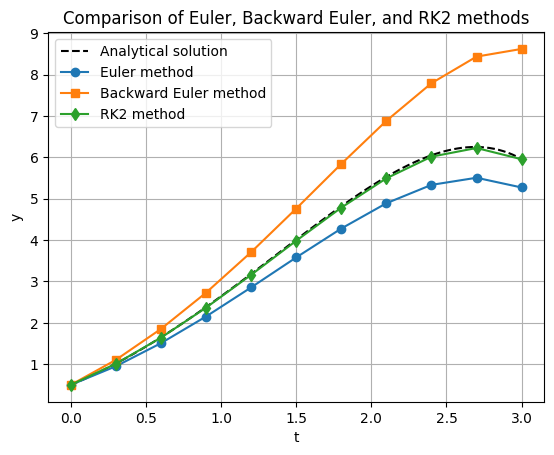

In [ ]:
# New ODE: y' = y - t^2 + 1
def f(t, y):
    return y - t**2 + 1

# Analytical solution for comparison
def analytical_solution(t):
    return (t + 1)**2 - 0.5 * np.exp(t)

# Initial conditions and parameters
t0 = 0
y0 = 0.5
h = 0.3
n = 10  # Number of steps

# Solve using all three methods
t_euler, y_euler = euler(t0, y0, h, n, f)
t_bw_euler, y_bw_euler = bw_euler(t0, y0, h, n, f)
t_rk2, y_rk2 = rk2(t0, y0, h, n, f)

# Analytical solution
t_analytical = np.linspace(t0, t0 + n * h, 100)
y_analytical = analytical_solution(t_analytical)

# Plotting the results
plt.plot(t_analytical, y_analytical, label="Analytical solution", color="black", linestyle="dashed")
plt.plot(t_euler, y_euler, 'o-', label="Euler method")
plt.plot(t_bw_euler, y_bw_euler, 's-', label="Backward Euler method")
plt.plot(t_rk2, y_rk2, 'd-', label="RK2 method")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title("Comparison of Euler, Backward Euler, and RK2 methods")
plt.grid(True)
plt.show()

# backward en general garantiza estabilidad a costa de perder velocidad

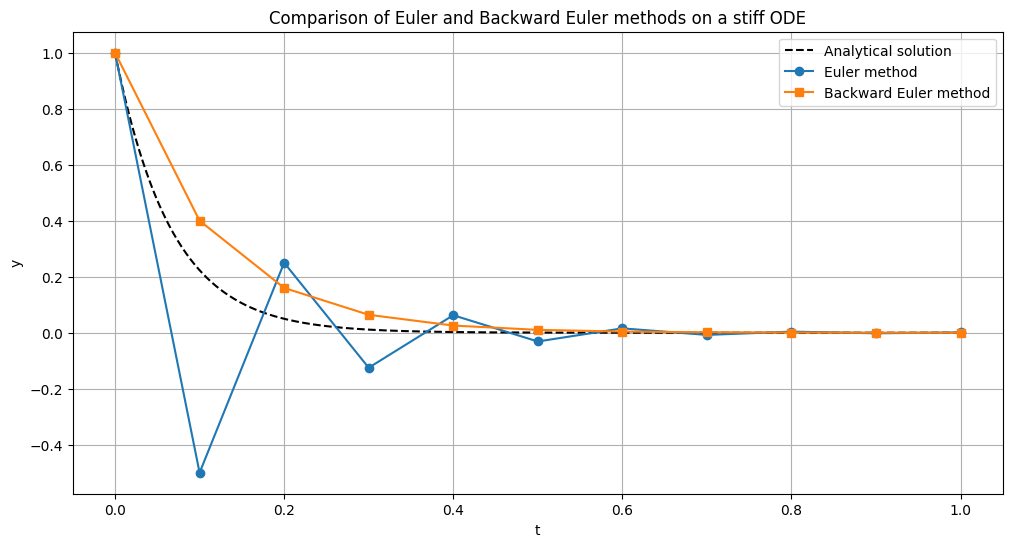

In [ ]:
# Stiff ODE: y' = -15y
def f(t, y):
    return -15 * y

# Analytical solution for comparison
def analytical_solution(t):
    return np.exp(-15 * t)

# Initial conditions and parameters
t0 = 0
y0 = 1.0
h = 0.1
n = 10  # Number of steps

# Solve using both methods
t_euler, y_euler = euler(t0, y0, h, n, f)
t_bw_euler, y_bw_euler = bw_euler(t0, y0, h, n, f)

# Analytical solution
t_analytical = np.linspace(t0, t0 + n * h, 1000)
y_analytical = analytical_solution(t_analytical)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(t_analytical, y_analytical, label="Analytical solution", color="black", linestyle="dashed")
plt.plot(t_euler, y_euler, 'o-', label="Euler method")
plt.plot(t_bw_euler, y_bw_euler, 's-', label="Backward Euler method")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title("Comparison of Euler and Backward Euler methods on a stiff ODE")
plt.grid(True)
plt.show()

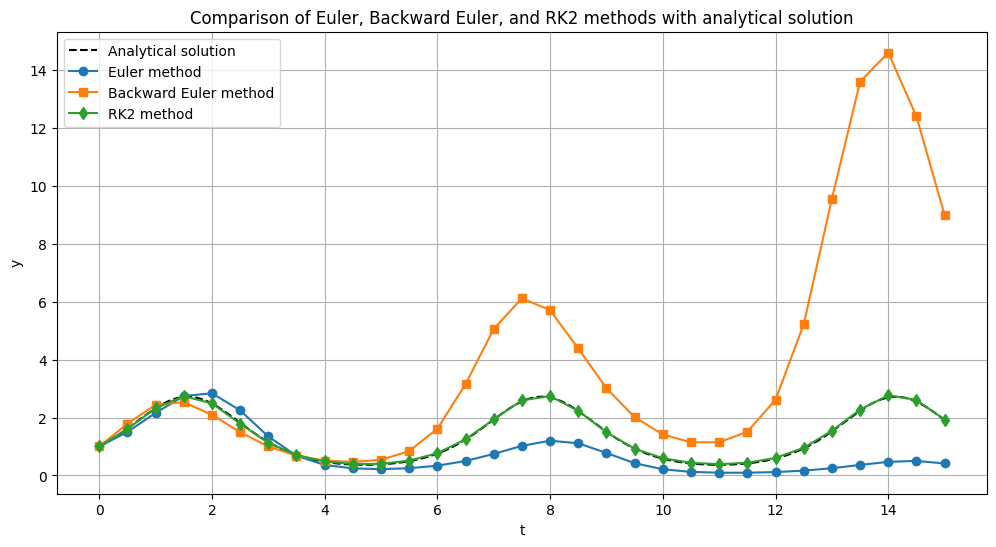

In [ ]:
# ODE: y' = y * cos(t)
def f(t, y):
    return y * np.cos(t)

# Analytical solution
def analytical_solution(t):
    return np.exp(np.sin(t))

# Initial conditions and parameters
t0 = 0
y0 = 1
h = 0.5
n = 30 # Number of steps

# Solve using all three methods
t_euler, y_euler = euler(t0, y0, h, n, f)
t_bw_euler, y_bw_euler = bw_euler(t0, y0, h, n, f)
t_rk2, y_rk2 = rk2(t0, y0, h, n, f)

# Analytical solution
t_analytical = np.linspace(t0, t0 + n * h, 1000)
y_analytical = analytical_solution(t_analytical)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(t_analytical, y_analytical, label="Analytical solution", color="black", linestyle="dashed")
plt.plot(t_euler, y_euler, 'o-', label="Euler method")
plt.plot(t_bw_euler, y_bw_euler, 's-', label="Backward Euler method")
plt.plot(t_rk2, y_rk2, 'd-', label="RK2 method")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title("Comparison of Euler, Backward Euler, and RK2 methods with analytical solution")
plt.grid(True)
plt.show()

# Ejemplos de segundo orden: ocilador armonico



In [ ]:
def euler_system(t0, y0, v0, h, n, f):
    t = np.arange(t0, t0 + (n+1) * h, h)
    y = np.zeros(len(t))
    v = np.zeros(len(t))
    y[0] = y0
    v[0] = v0
    for i in range(1, len(t)):
        y[i] = y[i-1] + h * v[i-1]
        v[i] = v[i-1] + h * f(t[i-1], y[i-1], v[i-1])
    return t, y, v

def bw_euler_system(t0, y0, v0, h, n, f):
    t = np.arange(t0, t0 + (n+1) * h, h)
    y = np.zeros(len(t))
    v = np.zeros(len(t))
    y[0] = y0
    v[0] = v0
    for i in range(1, len(t)):
        g_y = lambda y_new, v_prev, y_prev: y_new - y_prev - h * v_prev
        g_v = lambda v_new, t_new, y_prev, v_prev: v_new - v_prev - h * f(t_new, y_prev, v_new)
        y_new = fsolve(lambda y_new: g_y(y_new, v[i-1], y[i-1]), y[i-1])[0]
        v_new = fsolve(lambda v_new: g_v(v_new, t[i], y[i-1], v[i-1]), v[i-1])[0]
        y[i] = y_new
        v[i] = v_new
    return t, y, v

def rk2_system(t0, y0, v0, h, n, f):
    t = np.arange(t0, t0 + (n+1) * h, h)
    y = np.zeros(len(t))
    v = np.zeros(len(t))
    y[0] = y0
    v[0] = v0
    for i in range(1, len(t)):
        k1_y = v[i-1]
        k1_v = f(t[i-1], y[i-1], v[i-1])
        k2_y = v[i-1] + h/2 * k1_v
        k2_v = f(t[i-1] + h/2, y[i-1] + h/2 * k1_y, v[i-1] + h/2 * k1_v)
        y[i] = y[i-1] + h * k2_y
        v[i] = v[i-1] + h * k2_v
    return t, y, v

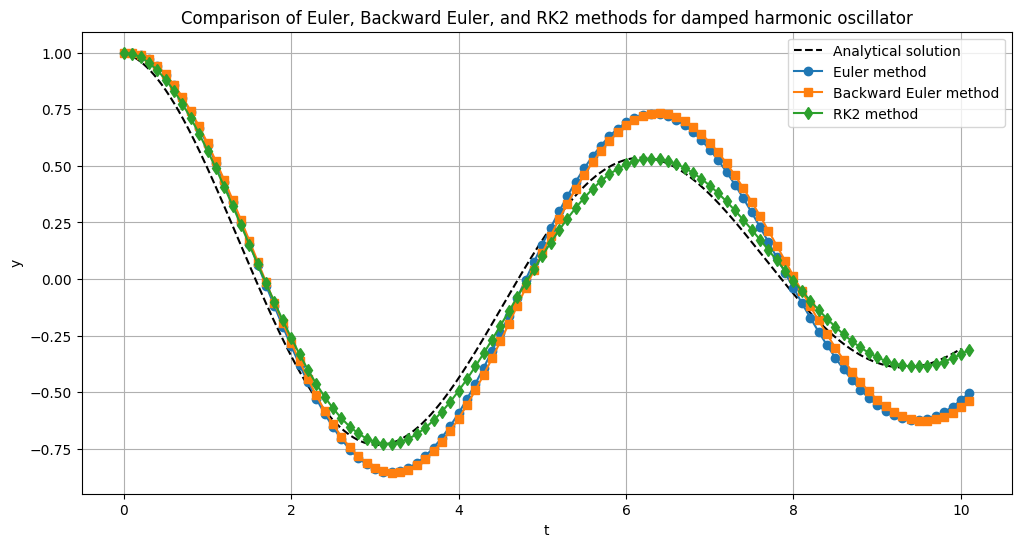

In [ ]:
# Example second-order ODE: y'' + 2*gamma*y' + omega^2*y = 0
# Rewrite as system: y' = v, v' = -2*gamma*v - omega^2*y

gamma = 0.1
omega = 1.0

def f(t, y, v):
    return -2*gamma*v - omega**2*y

# Initial conditions and parameters
t0 = 0
y0 = 1
v0 = 0
h = 0.1
n = 100  # Number of steps

# Solve using all three methods
t_euler, y_euler, v_euler = euler_system(t0, y0, v0, h, n, f)
t_bw_euler, y_bw_euler, v_bw_euler = bw_euler_system(t0, y0, v0, h, n, f)
t_rk2, y_rk2, v_rk2 = rk2_system(t0, y0, v0, h, n, f)

# Analytical solution for comparison
def analytical_solution_y(t):
    return np.exp(-gamma*t) * np.cos(omega*t)

def analytical_solution_v(t):
    return -gamma * np.exp(-gamma*t) * np.cos(omega*t) - omega * np.exp(-gamma*t) * np.sin(omega*t)

t_analytical = np.linspace(t0, t0 + n * h, 1000)
y_analytical = analytical_solution_y(t_analytical)
v_analytical = analytical_solution_v(t_analytical)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(t_analytical, y_analytical, label="Analytical solution", color="black", linestyle="dashed")
plt.plot(t_euler, y_euler, 'o-', label="Euler method")
plt.plot(t_bw_euler, y_bw_euler, 's-', label="Backward Euler method")
plt.plot(t_rk2, y_rk2, 'd-', label="RK2 method")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title("Comparison of Euler, Backward Euler, and RK2 methods for damped harmonic oscillator")
plt.grid(True)
plt.show()

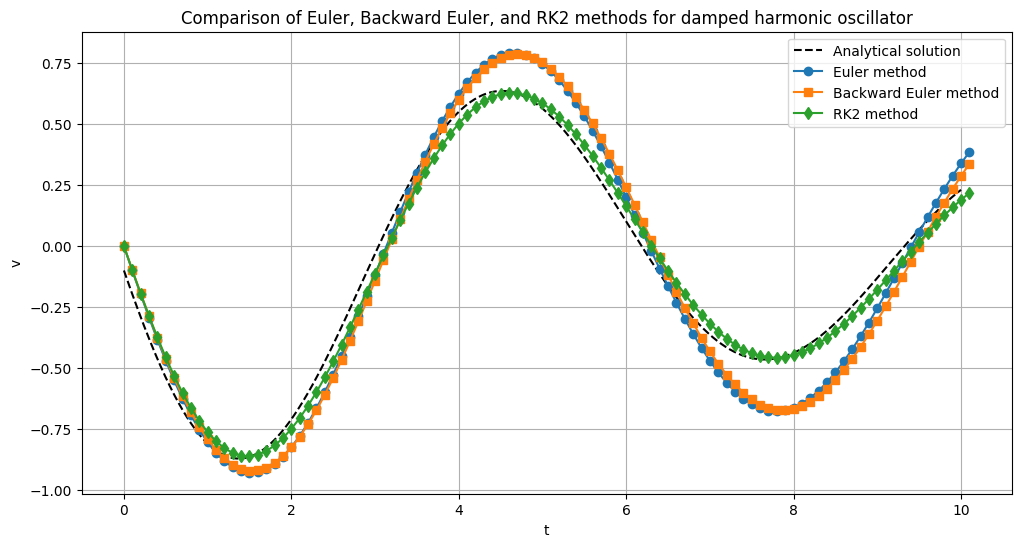

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(t_analytical, v_analytical, label="Analytical solution", color="black", linestyle="dashed")
plt.plot(t_euler, v_euler, 'o-', label="Euler method")
plt.plot(t_bw_euler, v_bw_euler, 's-', label="Backward Euler method")
plt.plot(t_rk2, v_rk2, 'd-', label="RK2 method")
plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.title("Comparison of Euler, Backward Euler, and RK2 methods for damped harmonic oscillator")
plt.grid(True)
plt.show()